# **Chapter 1. Foundations**
---
---

The aim of this chapter is to explain some foundational mental models that are essential for understanding how neural networks work. Specifically, we'll cover *nested mathematical functions and their derivatives.* We'll work our way up from the simplest possible building bloks to show that we can bild complicated functions made up of "chain" of constituent functions and, even when one of these functions is a matrix multiplication that takes in multiple inputs, compute the derivativeof the functions outputs with respect to their inputs.

As we're getting our bearings around these foundational building blocks of neural networks, we'll systematically descrive each concept we introduce from three perspectives:
* `Math`, in the form of an equation or equations
* `Code`, with as little axtra syntax as possible (making Python as ideal choice)
* A diagram explaining what is going on, of kind you would draw on a whitebboard during a coding interview.

With that out of the way, it’s time to take our first steps. We’re going to start with some extremely simple building blocks to illustrate how we can understand different concepts in terms of these three perspectives. Our first building block will be a simple but critical concept: `the function`.

## # Functions
---

What is a function, and how we descrive it? As with neural nets, there are several ways to describe functions, none of which  individually paints complete picture. Rather than trying give a pithy one-sentence description, let's simply walk through three mental models one by one, playing the role of the blind men feeling different parts of the elephant.

### ## Math

Here ara two exammples of functions, describbed in mathematical notation:
* $f_1(x) = x^2$
* $f_2(x) = max(x, 0)$

This notations says that the functions, which we arbbitrarily call $f_1$ and $f_2$, take in a nuber $x$ as input and transform it into $x^2$ (in first case) of $max(x, 0)$ (in the second case).

### ## Diagrams

One way of depicting functions is to:
1. Draw an $x-y$ plane (where $x$ refers to the horizontal axis and $y$ refer to vertical axis).
2. Plot a bunch of points, where the x-coordinates of the points are (usually evenly spaced) inputs of the function over some range, and the y-coordinates are the outputs of the function over that range.
3. Connect these plotted points.

Figure 1-1 shows the plot of these two functions.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0101.png" width="600px"/>
    <i>Figure 1-1. Two continuous, mostly differentiable functions</i>
</div>

However, there is another way to depict functions that isn’t as useful when learning calculus but that will be very useful for us when thinking about deep learning models. We can think of functions as boxes that take in numbers as input and produce numbers as output, like minifactories that have their own internal rules for what happens to the input. Figure 1-2 shows both these functions described as general rules and how they operate on specific inputs.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0102.png" width="600px"/>
    <i>Figure 1-2. Another way of looking at these functions</i>
</div>

### ## Code

Finally, we can describe these functions using code. Before we do, we should say a bit about the Python library on top of which we'll writting our functions: NumPy.

<br>

#### CODE CAVEAT #1: NUMPY

NumPy is a widely used Python library for fast numeric computation, the internals of which are mostly written in C. Simply put: the data we deal with in neural networks will always be held in a multidimensional array that is almost always either one-, two-, three-, or four-dimensional, but especially two- or three-dimensional. The ndarray class from the NumPy library allows us to operate on these arrays in ways that are both (a) intuitive and (b) fast. To take the simplest possible example: if we were storing our data in Python lists (or lists of lists), adding or multiplying the lists elementwise using normal syntax wouldn’t work, whereas it does work for ndarrays:


In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

In [2]:
np.set_printoptions(precision=4)

In [3]:
print("Python list operations:")

a = [1, 2, 3]
b = [4, 5, 6]

print("a + b : ", a + b)

try:
    print(a * b)
except TypeError:
    print("a * b has no meaning for Python lists")
    
print()
print("Numpy array operation:")

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print("a + b : ", a + b)
print("a * b : ", a * b)

Python list operations:
a + b :  [1, 2, 3, 4, 5, 6]
a * b has no meaning for Python lists

Numpy array operation:
a + b :  [5 7 9]
a * b :  [ 4 10 18]


ndarrays also have several features you'd expect from an n-dimensional array; each ndarray has n axis, indexed from 0, so that the first axis is 0, the second is 1, and so on. In particular, since we deal with 2D ndarrays often, we can think od axis = 0 as the rows and axis = 1 as the columns--see Figure 1-3.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0103.png" width="300px"/>
    <i>Figure 1-3. A 2D NumPy array, with axis = 0 as the rows and axis = 1 as the columns</i>
</div>

NumPy's ndarrays also support applying functions along these axes in intuitive ways. For example, summing along axis 0 (the *rows* for a 2D array) essentially "collapses the array" along that axis returning an array with one less dimension the the original array; for a 2D array, this is equivalent to summing each column:

In [4]:
a = np.array([[1, 2, 3],
             [4, 5, 6]])

In [5]:
print("a:")
print(a)
print("a.sum(axis=0) : ", a.sum(axis=0))
print("a.sum(axis=1) : ", a.sum(axis=1))

a:
[[1 2 3]
 [4 5 6]]
a.sum(axis=0) :  [5 7 9]
a.sum(axis=1) :  [ 6 15]


Finnaly, NumPy ndarrays support adding a 1D array to the last axis; for a 2D aray a with R rows and C columns, this means we can add a 1D array b of length C and NumPy will do the additional in the intuitive way, adding the elements to each row of a:

In [6]:
b = np.array([10, 20, 30])

print("a + b : \n", a + b)

a + b : 
 [[11 22 33]
 [14 25 36]]


#### CODE CAVEAT #2: TYPE - CHECKED FUNCTIONS

As I've mentioned, the primary goal of the code we write in this book is to make the concepts I'm explaining precise and clear. This will get more challenging as the book goes on, as we'll be writing functions with many arguments as part of complicated class. To combat this, we'll use functions with type signatures throughtout as follows:

```python
def __init__(self,
             layers: List[Layer],
             loss: Loss,
             learning_rate: Float = 0.01) -> None:
```

This type signature alone give you some idea of what the class is used for. By contrast, consider the following type signature that we could use the define an operation:

```python
def operation(x1, x2):
```

This type signature by itself gives you no hint as to what is going on; only by printing out each object’s type, seeing what operations get performed on each object, or guessing based on the names x1 and x2 could we understand what is going on in this function. I can instead define a function with a type signature as follows:

```python
def operation(x1: ndarray, x2: ndarray) -> ndarray:
```

You know right away that this is a function that takes in two ndarrays, probably combines them in some way, and outputs the result of that combination. Because of the increased clarity they provide, we’ll use type-checked functions throughout this book.

#### BASIC FUNCTIONS IN NUMPY

With these preliminaries in mind, let's write up the functions we defined earlier in NumPy:

In [7]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray.
    '''
    return np.maximum(0.2 * x, x)

In [8]:
IMG_FOLDER_PATH = os.path.join("asset", "chapter_1", "images")
PDF_FOLDER_PATH = os.path.join("asset", "chapter_1", "pdf_images")

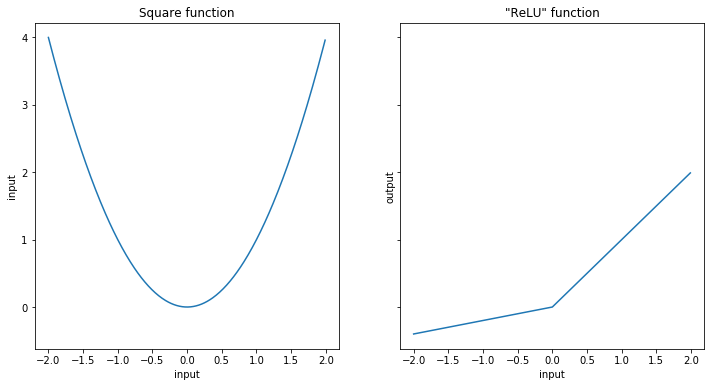

In [10]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('input')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')

plt.savefig(os.path.join(IMG_FOLDER_PATH, "01_two_functions.png"))
plt.savefig(os.path.join(PDF_FOLDER_PATH, "01_two_functions.pdf"))

<h4 align="center"><strong>NOTE</strong></h4>

> One of NumPy’s quirks is that many functions can be applied to ndarrays either by writing np.function_name(ndarray) or by writing ndarray.function_name. For example, the preceding relu function could be written as: x.clip(min=0). We’ll try to be consistent and use the np.function_name(ndarray) convention throughout—in particular, we’ll avoid tricks such as ndarray.T for transposing a two-dimensional ndarray, instead writing np.transpose(ndarray, (1, 0)).